In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


# BALANCEAMENTO DA BASE

In [3]:
#Fazendo leitura da base
df = pd.read_csv("base_filtrada.csv")

In [4]:
df.shape

(86995, 49)

In [5]:
#REMOVENDO LINHAS ONDE A PERGUNTA DE DEPRESSÃO ESTA NULA
df = df[df['Q092'].notna()]


In [6]:
df.shape

(33321, 49)

In [7]:
df

,Unnamed: 0,C006,M01401,M01501,E01602,VDF001,E017,D00901,Q092,A001,...,P02001,P01601,P018,P02002,P023,P02501,P02602,P02601,E001,P050
5,19,2.0,3.0,0.0,NaN,2.0,NaN,NaN,2.0,2.0,...,2.0,4.0,3.0,1.0,7.0,2.0,0.0,3.0,2.0,3.0
8,26,2.0,2.0,2.0,NaN,2.0,NaN,10.0,2.0,1.0,...,7.0,0.0,3.0,5.0,2.0,7.0,0.0,4.0,2.0,2.0
9,29,1.0,0.0,2.0,1400.0,2.0,48.0,10.0,2.0,1.0,...,0.0,7.0,7.0,0.0,7.0,0.0,0.0,3.0,1.0,3.0
12,34,1.0,2.0,0.0,1600.0,2.0,35.0,10.0,2.0,1.0,...,0.0,0.0,2.0,0.0,7.0,0.0,0.0,4.0,1.0,3.0
14,41,2.0,3.0,2.0,NaN,2.0,NaN,7.0,2.0,1.0,...,0.0,1.0,0.0,4.0,2.0,7.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86982,293682,1.0,3.0,2.0,800.0,2.0,40.0,7.0,2.0,1.0,...,0.0,3.0,4.0,5.0,2.0,0.0,0.0,3.0,1.0,1.0
86983,293685,1.0,2.0,3.0,1300.0,2.0,40.0,7.0,2.0,1.0,...,0.0,0.0,2.0,0.0,0.0,2.0,0.0,4.0,1.0,1.0
86987,293702,2.0,1.0,0.0,NaN,1.0,NaN,10.0,2.0,1.0,...,0.0,7.0,7.0,0.0,0.0,2.0,2.0,3.0,2.0,3.0
86991,293713,2.0,3.0,0.0,NaN,2.0,NaN,7.0,2.0,1.0,...,0.0,0.0,1.0,1.0,7.0,7.0,0.0,3.0,2.0,3.0


In [8]:
#Separando  por X e Y
X = df.drop('Q092', axis=1)
y = df['Q092']

In [9]:
y.value_counts()

Q092
2.0    31042
1.0     2279
Name: count, dtype: int64

<Axes: ylabel='count'>

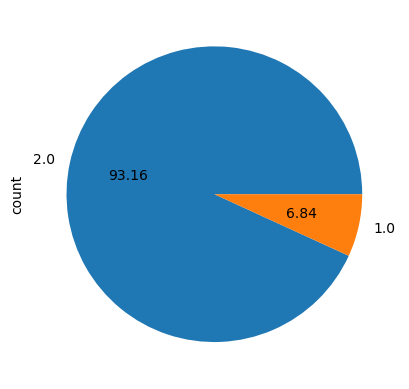

In [10]:
#Verificando proporção da base
y.value_counts().plot.pie(autopct='%.2f')

In [11]:
#Separando por modelo de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=None, stratify=y)

### APÓS SEPARAR E FILTRAR LEVEMENTE A BASE IREMOS INICIAR O BALANCEAMENTO

In [12]:
#Importando random UnderSampler
from imblearn.under_sampling import RandomUnderSampler

In [13]:
#definindo o Random UnderSampler
rus = RandomUnderSampler(random_state=42)

In [14]:
#aplicando pra x e y (ambos de treino, sempre de treino)
X_res, y_res = rus.fit_resample(X, y)

<Axes: ylabel='count'>

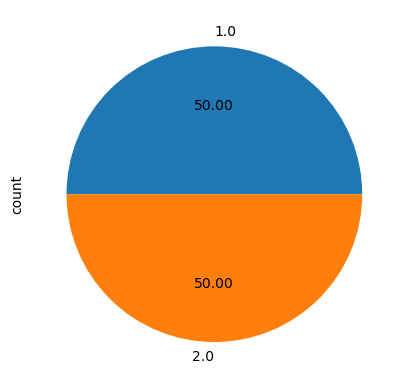

In [15]:
#Visualizando graficamente o balanceamento
y_res.value_counts().plot.pie(autopct='%.2f')

In [16]:
#Visualizando numericamente
y_res.value_counts()

Q092
1.0    2279
2.0    2279
Name: count, dtype: int64

### Importando Arquivo da base balanceamento

In [17]:
df = pd.concat([X_res,y_res], axis=1)

In [18]:
df

,Unnamed: 0,C006,M01401,M01501,E01602,VDF001,E017,D00901,A001,A002010,...,P01601,P018,P02002,P023,P02501,P02602,P02601,E001,P050,Q092
22,62,2.0,3.0,3.0,20000.0,2.0,40.0,13.0,2.0,1.0,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0
132,393,2.0,0.0,3.0,NaN,2.0,NaN,NaN,1.0,2.0,...,4.0,4.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,1.0
215,675,2.0,3.0,2.0,2000.0,2.0,30.0,10.0,1.0,1.0,...,6.0,7.0,0.0,7.0,5.0,0.0,4.0,2.0,3.0,1.0
318,1009,2.0,3.0,1.0,3001.0,2.0,50.0,12.0,2.0,1.0,...,7.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,1.0
395,1276,2.0,3.0,2.0,NaN,2.0,NaN,10.0,1.0,1.0,...,3.0,7.0,2.0,5.0,2.0,0.0,2.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67738,228022,2.0,1.0,2.0,998.0,2.0,36.0,10.0,1.0,2.0,...,0.0,1.0,0.0,1.0,7.0,0.0,3.0,1.0,3.0,2.0
45245,150551,1.0,1.0,0.0,1200.0,2.0,60.0,10.0,1.0,1.0,...,4.0,1.0,0.0,0.0,7.0,0.0,4.0,1.0,3.0,2.0
36021,119133,2.0,3.0,0.0,1200.0,2.0,48.0,10.0,1.0,1.0,...,7.0,3.0,7.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0
73302,246966,2.0,3.0,0.0,600.0,2.0,50.0,10.0,1.0,4.0,...,1.0,5.0,2.0,0.0,0.0,0.0,3.0,1.0,3.0,2.0


In [19]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [20]:
df

,C006,M01401,M01501,E01602,VDF001,E017,D00901,A001,A002010,A003010,...,P01601,P018,P02002,P023,P02501,P02602,P02601,E001,P050,Q092
22,2.0,3.0,3.0,20000.0,2.0,40.0,13.0,2.0,1.0,2.0,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0
132,2.0,0.0,3.0,NaN,2.0,NaN,NaN,1.0,2.0,1.0,...,4.0,4.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,1.0
215,2.0,3.0,2.0,2000.0,2.0,30.0,10.0,1.0,1.0,1.0,...,6.0,7.0,0.0,7.0,5.0,0.0,4.0,2.0,3.0,1.0
318,2.0,3.0,1.0,3001.0,2.0,50.0,12.0,2.0,1.0,3.0,...,7.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,1.0
395,2.0,3.0,2.0,NaN,2.0,NaN,10.0,1.0,1.0,1.0,...,3.0,7.0,2.0,5.0,2.0,0.0,2.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67738,2.0,1.0,2.0,998.0,2.0,36.0,10.0,1.0,2.0,3.0,...,0.0,1.0,0.0,1.0,7.0,0.0,3.0,1.0,3.0,2.0
45245,1.0,1.0,0.0,1200.0,2.0,60.0,10.0,1.0,1.0,2.0,...,4.0,1.0,0.0,0.0,7.0,0.0,4.0,1.0,3.0,2.0
36021,2.0,3.0,0.0,1200.0,2.0,48.0,10.0,1.0,1.0,1.0,...,7.0,3.0,7.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0
73302,2.0,3.0,0.0,600.0,2.0,50.0,10.0,1.0,4.0,1.0,...,1.0,5.0,2.0,0.0,0.0,0.0,3.0,1.0,3.0,2.0


In [21]:
df.to_csv("base_balanceada", index=False)

In [22]:
df['Q092'].value_counts()

Q092
1.0    2279
2.0    2279
Name: count, dtype: int64